In [4]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
from utils.data_io import create_time_bins, get_cam_timestamps, load_ONE, get_experiment_path, get_dlc_df, get_rotary_position, temporally_align_variable, preprocess_dlc_data
from utils.behavioral_analysis import calculate_median_position
from utils.visualization import plot_single_session, plot_all_sessions, plot_sorted_spike_counts, plot_PCA, plot_correlation_distributions, plot_dlc_analyses
from utils.pipeline import load_and_process_session, analyze_single_session, analyze_multiple_sessions
from utils.statistical_testing import categorise_neurons
from utils.correlation_analysis import run_PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from types import SimpleNamespace as Bunch
import seaborn as sns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
subject_id = "AV043"
my_sessions = [
    ('AV043', '2024-03-04'),
    ('AV043', '2024-03-05'),
    ('AV043', '2024-03-08'),
    ('AV043', '2024-03-11'),
    ('AV043', '2024-03-13'),
    ('AV043', '2024-03-14'),
    ('AV043', '2024-03-26'),
    ('EB036', '2024-03-20'),
    ('EB036', '2024-03-22'),
    ('EB037', '2024-03-20'),
    ('EB037', '2024-03-21'),
    ('EB037', '2024-03-22'),
    ('GB011', '2024-05-09'),
    ('GB011', '2024-05-10'),
    ('GB011', '2024-05-14'),
    ('GB011', '2024-05-15'),
    ('GB011', '2024-05-16'),
    ('GB011', '2024-05-17'),
    ('GB012', '2024-06-19'),
    ('GB012', '2024-06-20'),
    ('GB012', '2024-06-21'),
    ('GB012', '2024-06-25'),
    ('GB012', '2024-07-11'),
    ('GB012', '2024-07-12'),
    ('GB012', '2024-07-16'),

    
]

In [7]:
all_sessions = analyze_multiple_sessions(my_sessions)

(array([], dtype=int64),)
No probe1 data found
Loaded and analyzed: AV043 - 2024-03-04
(array([], dtype=int64),)
No probe1 data found
Loaded and analyzed: AV043 - 2024-03-05
Failed: AV043 - 2024-03-08: Boolean index has wrong length: 150800 instead of 20508
(array([], dtype=int64),)
No probe1 data found
Loaded and analyzed: AV043 - 2024-03-11
(array([], dtype=int64),)
No probe1 data found
Loaded and analyzed: AV043 - 2024-03-13
(array([], dtype=int64),)
No probe1 data found
Loaded and analyzed: AV043 - 2024-03-14
(array([], dtype=int64),)
No probe0 data found
No probe1 data found
Failed: AV043 - 2024-03-26: object of type 'NoneType' has no len()
(array([], dtype=int64),)
Loaded and analyzed: EB036 - 2024-03-20
(array([], dtype=int64),)
Loaded and analyzed: EB036 - 2024-03-22
(array([], dtype=int64),)
Loaded and analyzed: EB037 - 2024-03-20
(array([], dtype=int64),)
Loaded and analyzed: EB037 - 2024-03-21
(array([], dtype=int64),)
Loaded and analyzed: EB037 - 2024-03-22
(array([], dtype

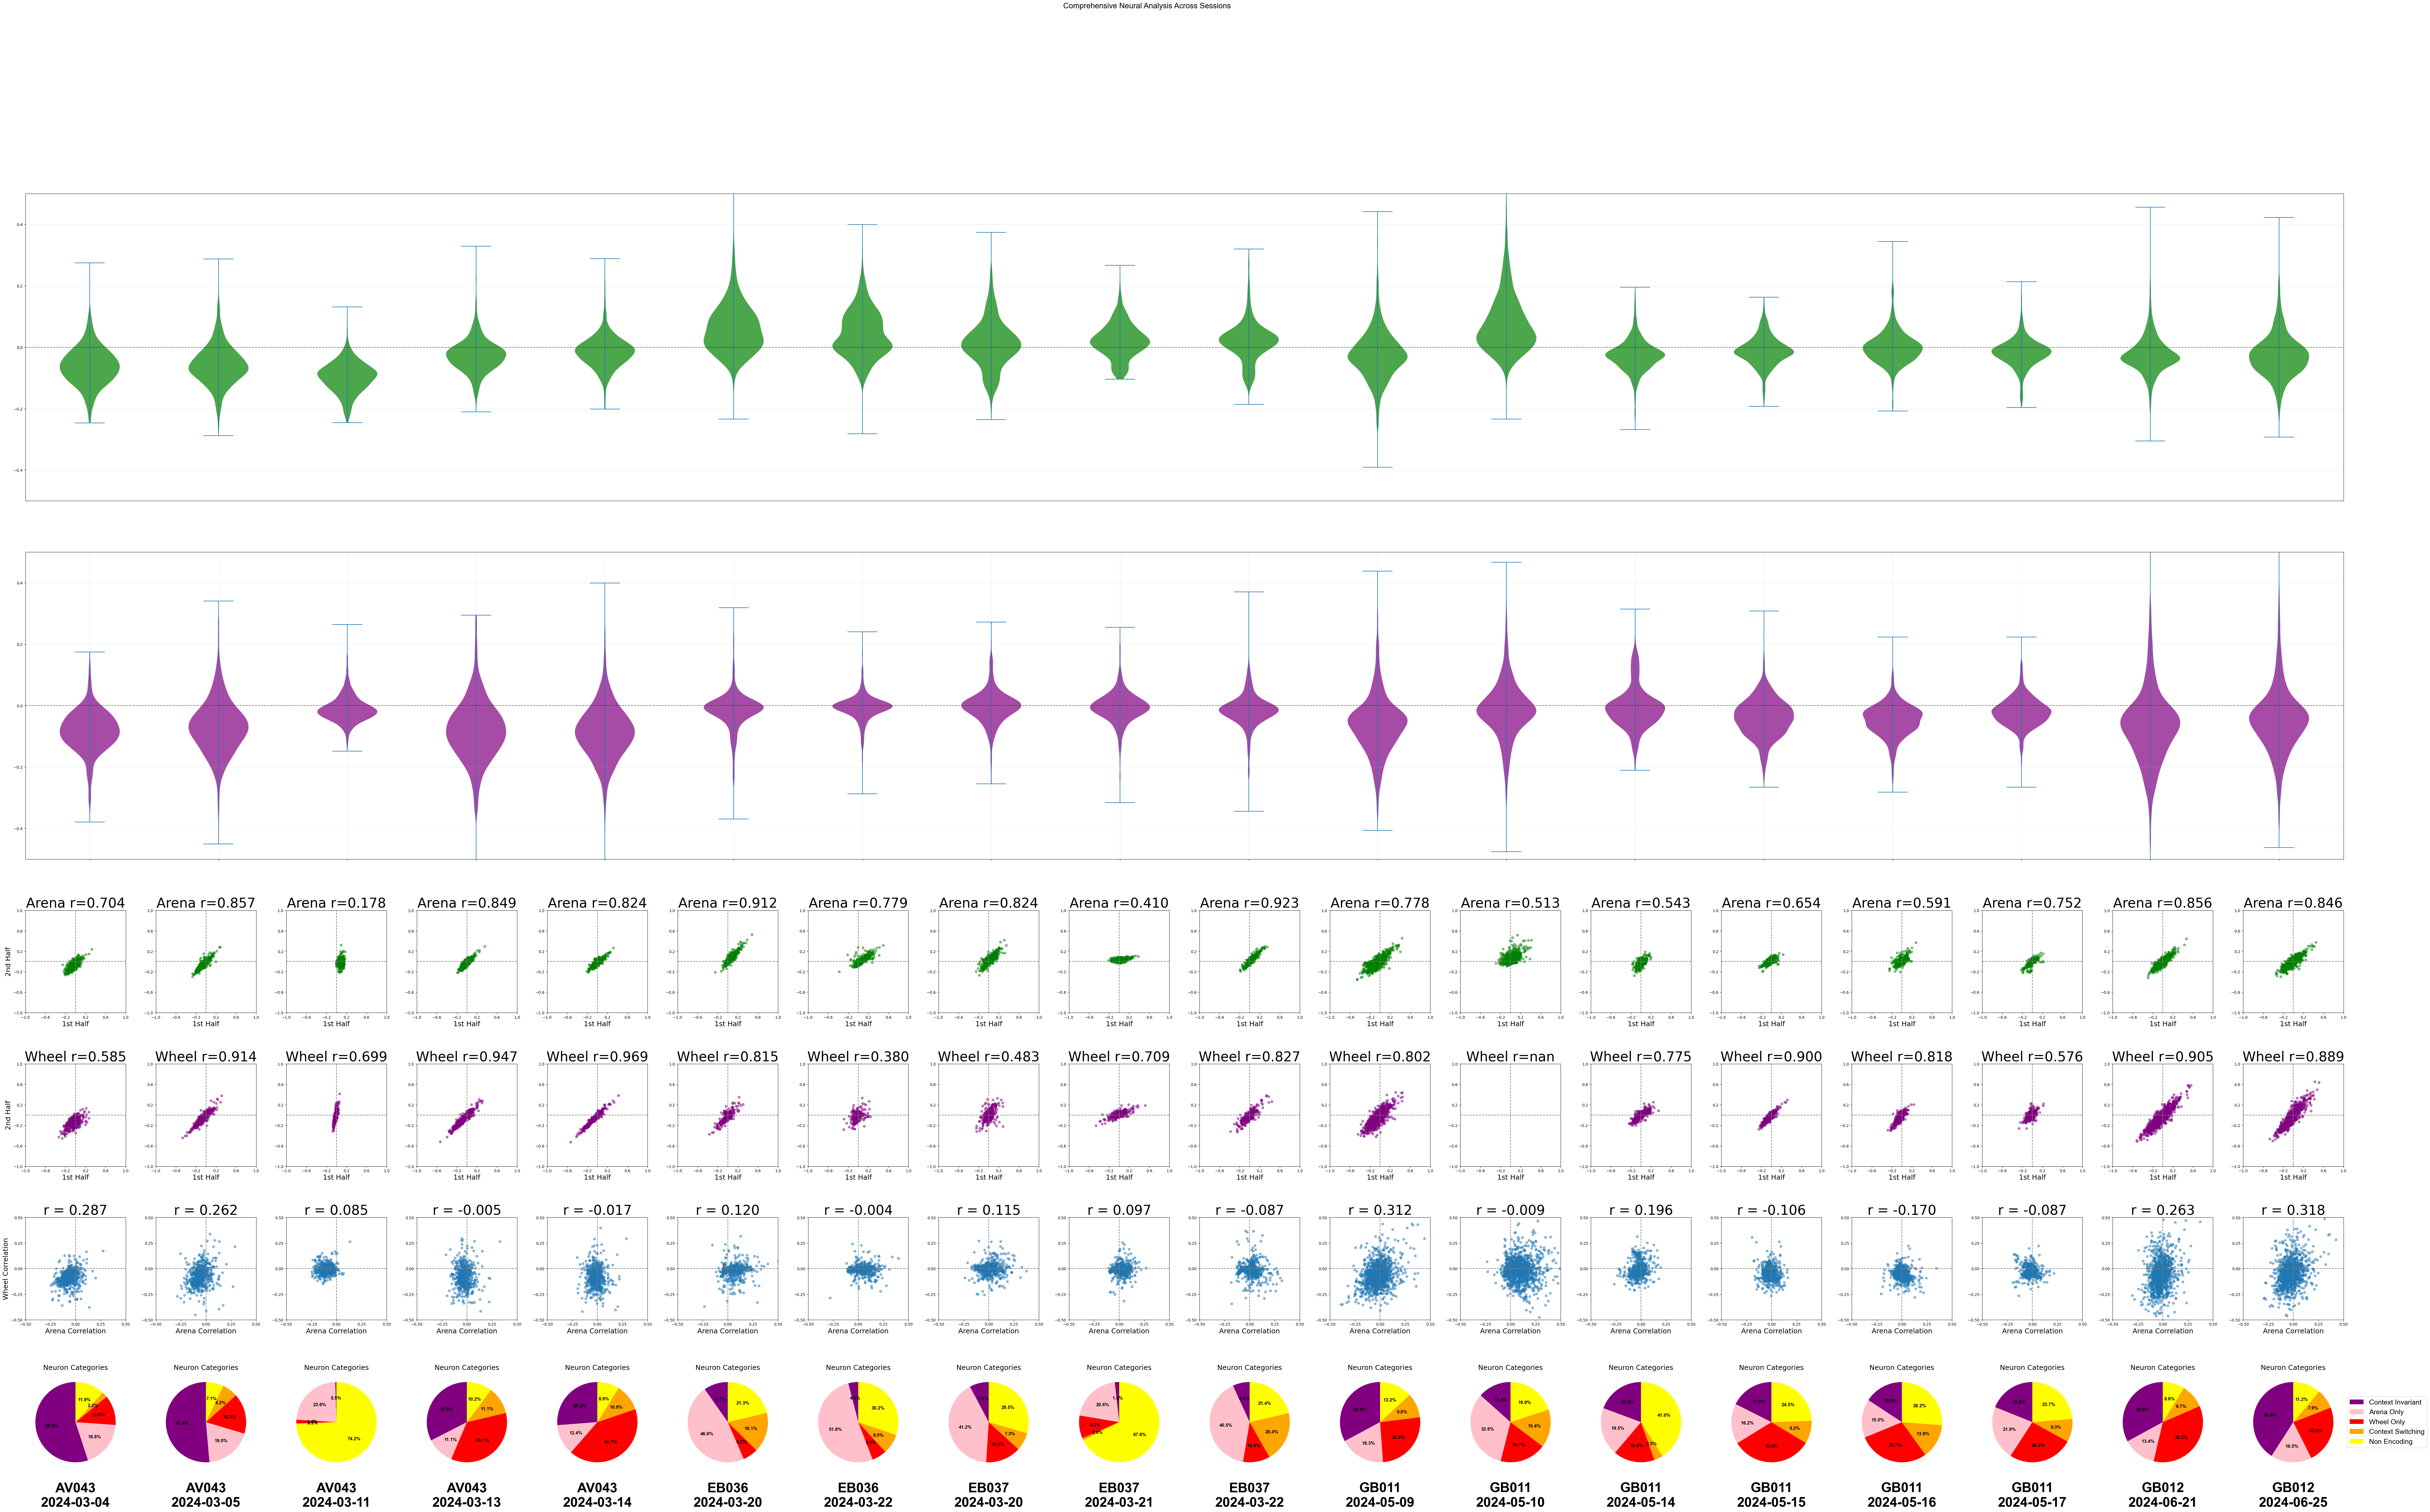

KeyboardInterrupt: 

In [8]:
plot_all_sessions(all_sessions)

In [ ]:
def get_reliability_Stability(session):

        r_oa_1= session.r_oa_first_half
        r_oa_2 = session.r_oa_second_half
        r_wh_1= session.r_wh_first_half
        r_wh_2= session.r_wh_second_half
        r_oa_1_2 = session.oa_stability
        r_wh_1_2 = session.wh_stability


        r_oa_1_wh_2 = np.corrcoef(r_oa_1, r_wh_2) [0,1]
        r_oa_2_wh_1 = np.corrcoef(r_oa_2, r_wh_1) [0,1]


        session.reliability = np.sqrt(r_oa_1_2* r_wh_1_2) 

        
        z1 = np.arctanh(r_oa_1_wh_2)
        z2 = np.arctanh(r_oa_2_wh_1)

        z_mean = (z1 + z2 ) / 2
        session.stability = np.tanh(z_mean)


def plot_reliability_stability(session):
    
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 14
    plt.rcParams['axes.linewidth'] = 1.5
    plt.rcParams['xtick.major.width'] = 1.5
    plt.rcParams['ytick.major.width'] = 1.5
    plt.rcParams['xtick.major.size'] = 6
    plt.rcParams['ytick.major.size'] = 6

    fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=300)

    reliability_values = []
    stability_values = []
    brain_regions = []

    for session in all_sessions:
        
        reliability_values.append(session.reliability)
        stability_values.append(session.stability)
        
    
        if session.subject_id[:2] == 'EB':
            brain_regions.append('Hippocampus')
        else:
            brain_regions.append('Secondary Motor Cortex')


    reliability_values = np.array(reliability_values)
    stability_values = np.array(stability_values)
    brain_regions = np.array(brain_regions)


    colors = {
        'Hippocampus':"#132B97",  
        'Secondary Motor Cortex':"#690B0B" 
    }  
    for region in ['Hippocampus', 'Secondary Motor Cortex']:
        mask = brain_regions == region
        
        ax.scatter(reliability_values[mask], 
                stability_values[mask], 
                c=colors[region],
                s=100,  
                alpha=0.7,  
                edgecolors='none',  
                linewidth=0.5,
                label=region,
                zorder=3)

    ax.plot([0, 1], [0, 1], 'k-', linewidth=1.5, alpha=0.5, zorder=1)

    ax.set_xlim(-0.10, 1.05)
    ax.set_ylim(-0.10, 1.05)

    ax.set_xlabel('reliability within context', fontsize=16)
    ax.set_ylabel('stability between contexts', fontsize=16)

    # Add legend
    legend = ax.legend(loc='upper left', 
                    frameon=True, 
                    fancybox=False,
                    edgecolor='black',
                    fontsize=12)
    legend.get_frame().set_linewidth(0.5)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set tick parameters
    ax.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6)


    ax.set_aspect('equal', adjustable='box')

    plt.tight_layout()